Name: Borris A. Esplanada

Section: CPE32S1

Instructions:

* Choose any dataset applicable to either a classification problem or a regression problem.
* Explain your datasets and the problem being addressed.
* Show evidence that you can do the following:
 1. Save a model in HDF5 format
 2. Save a model and load the model in a JSON format
 3. Save a model and load the model in a YAML format
 4. Checkpoint Neural Network Model Improvements
 5. Checkpoint Best Neural Network Model only
 6. Load a saved Neural Network model
 7. Visualize Model Training History in Keras
 8. Show the application of Dropout Regularization
 9. Show the application of Dropout on the visible layer
 10. Show the application of Dropout on the hidden layer
 11. Show the application of a time-based learning rate schedule
 12. Show the application of a drop-based learning rate schedule
* Submit the link to your Google Colab (make sure that it is accessible to me)
NOTE:

Submit a well-prepared notebook for your report
Include conclusion or learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


**Classification Problem**

Title: Personal Loan Modeling

Link: https://www.kaggle.com/datasets/teertha/personal-loan-modeling

Explain your datasets and the problem being addressed.

The Personal Loan Modeling dataset contains information about customers of a bank, including their personal and financial details, as well as whether or not they accepted a personal loan offer in the past. The dataset consists of 5,000 rows and 14 columns.

The problem being addressed is whether or not a customer will accept a personal loan offer. This is a binary classification problem, where the goal is to predict whether a customer will accept the loan offer or not based on their personal and financial information.

This is important to banks and other financial institutions because they want to make targeted marketing efforts towards customers who are most likely to accept personal loan offers, so they can increase their chances of making a profit.

By using this dataset, banks can gain insights into what factors may influence a customer's decision to accept a personal loan offer and adjust their marketing strategy accordingly.

For classification, do the following:
- Create a base model
- Evaluate the model with k-fold cross validation
- Improve the accuracy of your model by applying additional hidden layers

In [ ]:
path = "/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv"
df = pd.read_csv(path)

1. Save a model in HDF5 format

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load dataset

df = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")
X = df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
Y = df['Personal Loan']
X_train, Y_train = X[:3500], Y[:3500]
X_test, Y_test = X[3500:], Y[3500:]


In [ ]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, callbacks=[checkpoint])


Epoch 1/50
110/110 [==============================] - 1s 5ms/step - loss: 7.2153 - accuracy: 0.6114 - val_loss: 0.5688 - val_accuracy: 0.8873
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.8617 - val_loss: 0.4424 - val_accuracy: 0.8847
Epoch 3/50
110/110 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.8546 - val_loss: 0.3747 - val_accuracy: 0.8973
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.8629 - val_loss: 0.3286 - val_accuracy: 0.8860
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.3845 - accuracy: 0.8689 - val_loss: 0.2987 - val_accuracy: 0.8787
Epoch 6/50
110/110 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.8737 - val_loss: 0.2612 - val_accuracy: 0.9073
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.3087 - accuracy: 0.8829 - val_loss: 0.2502 - val_accuracy: 0.9027
Epoch 

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

47/47 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9547
Test loss: 0.11981695890426636
Test accuracy: 0.9546666741371155


In [ ]:
best_model = load_model('best_model.h5')

2. Save a model and load the model in a JSON format

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [ ]:
# load dataset

df = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")
X = df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
Y = df['Personal Loan']
X_train, Y_train = X[:3500], Y[:3500]
X_test, Y_test = X[3500:], Y[3500:]

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, callbacks=[checkpoint])

Epoch 1/50
110/110 [==============================] - 1s 5ms/step - loss: 6.0605 - accuracy: 0.5246 - val_loss: 0.6234 - val_accuracy: 0.8140
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.8514 - val_loss: 0.2937 - val_accuracy: 0.8893
Epoch 3/50
110/110 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8854 - val_loss: 0.2502 - val_accuracy: 0.9033
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.8874 - val_loss: 0.2378 - val_accuracy: 0.8993
Epoch 5/50
110/110 [==============================] - 1s 8ms/step - loss: 0.2669 - accuracy: 0.8909 - val_loss: 0.2219 - val_accuracy: 0.9027
Epoch 6/50
110/110 [==============================] - 0s 3ms/step - loss: 0.2640 - accuracy: 0.8929 - val_loss: 0.2255 - val_accuracy: 0.8980
Epoch 7/50
110/110 [==============================] - 1s 8ms/step - loss: 0.2409 - accuracy: 0.9009 - val_loss: 0.2124 - val_accuracy: 0.9060
Epoch 

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
from keras.models import model_from_json

with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)


In [ ]:
loaded_model.load_weights('best_model.h5')

3. Save a model and load the model in a YAML format

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint


In [ ]:
# load dataset

df = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")
X = df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
Y = df['Personal Loan']
X_train, Y_train = X[:3500], Y[:3500]
X_test, Y_test = X[3500:], Y[3500:]


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, callbacks=[checkpoint])


Epoch 1/50
110/110 [==============================] - 2s 7ms/step - loss: 0.7679 - accuracy: 0.7974 - val_loss: 0.2642 - val_accuracy: 0.8940
Epoch 2/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2828 - accuracy: 0.8860 - val_loss: 0.2199 - val_accuracy: 0.9013
Epoch 3/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2518 - accuracy: 0.8894 - val_loss: 0.2284 - val_accuracy: 0.9087
Epoch 4/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.8997 - val_loss: 0.1913 - val_accuracy: 0.9087
Epoch 5/50
110/110 [==============================] - 1s 4ms/step - loss: 0.2241 - accuracy: 0.8969 - val_loss: 0.2013 - val_accuracy: 0.9020
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.2184 - accuracy: 0.9014 - val_loss: 0.1754 - val_accuracy: 0.9220
Epoch 7/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9031 - val_loss: 0.1719 - val_accuracy: 0.9220
Epoch 

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
from keras.models import model_from_json

with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)


In [ ]:
loaded_model.load_weights('best_model.h5')


5. Checkpoint Best Neural Network Model only

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
df = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")

# Split data into input and output variables
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callback to save best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train model with callback
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.6026 - accuracy: 0.6862 - val_loss: 0.3695 - val_accuracy: 0.8920
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.9275 - val_loss: 0.2513 - val_accuracy: 0.9100
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1809 - accuracy: 0.9420 - val_loss: 0.2083 - val_accuracy: 0.9220
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9482 - val_loss: 0.1855 - val_accuracy: 0.9300
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9542 - val_loss: 0.1712 - val_accuracy: 0.9350
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.9592 - val_loss: 0.1596 - val_accuracy: 0.9370
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9628 - val_loss: 0.1486 - val_accuracy: 0.9430

7. Visualize Model Training History in Keras

8. Show the application of Dropout Regularization

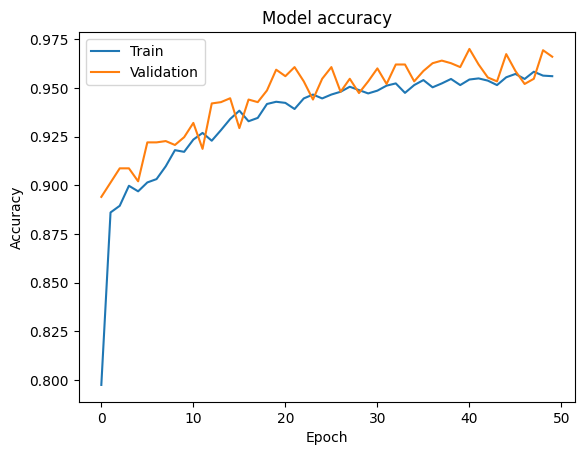

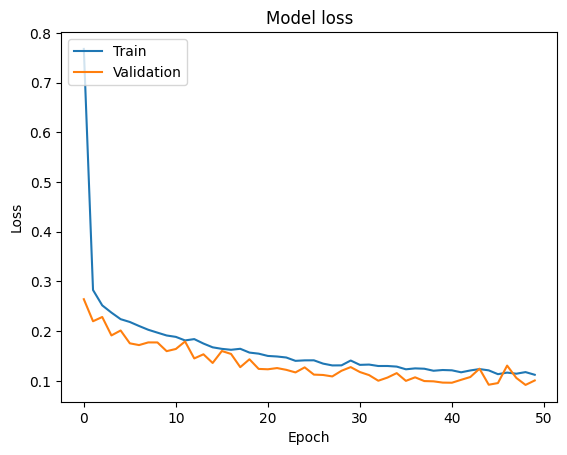

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")

# Split the data into input features and labels
X = data.drop(['ID', 'Personal Loan'], axis=1)
y = data['Personal Loan']

# Build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


9. Show the application of Dropout on the visible layer

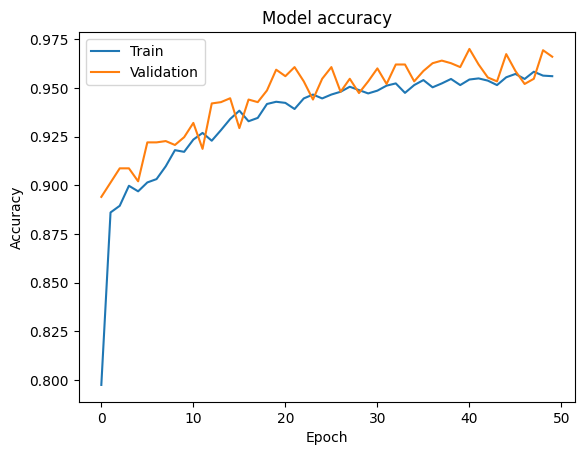

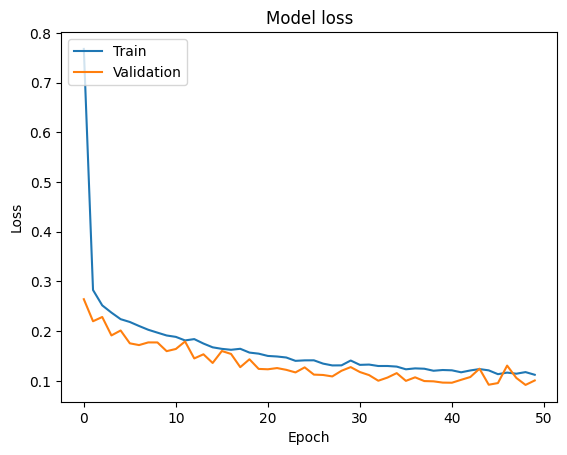

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")

# Split the data into input features and labels
X = data.drop(['ID', 'Personal Loan'], axis=1)
y = data['Personal Loan']

# Build the model with Dropout on the visible layer
model = Sequential()
model.add(Dropout(0.2, input_shape=(10,))) # Dropout layer on the input layer with 20% dropout rate
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


10. Show the application of Dropout on the hidden layer

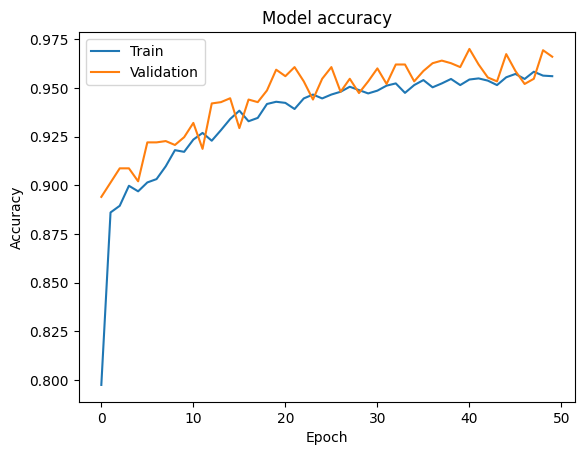

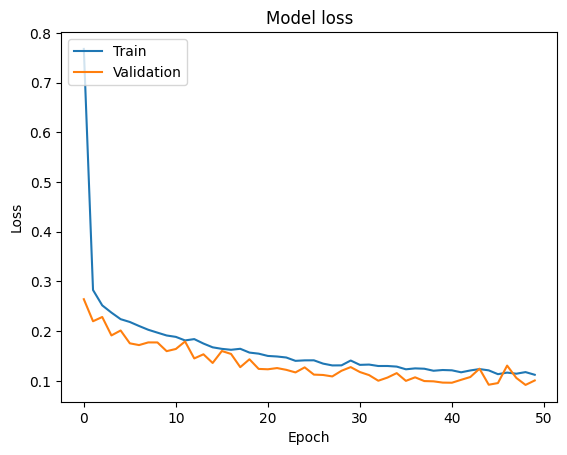

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")

# Split the data into input features and labels
X = data.drop(['ID', 'Personal Loan'], axis=1)
y = data['Personal Loan']

# Build the model with Dropout on the hidden layer
model = Sequential()
model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dropout(0.2)) # Dropout layer on the first hidden layer with 20% dropout rate
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


11. Show the application of a time-based learning rate schedule

Epoch 1/40
125/125 [==============================] - 5s 9ms/step - loss: 24.2029 - accuracy: 0.8622 - val_loss: 0.6503 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 2/40
125/125 [==============================] - 1s 8ms/step - loss: 0.6319 - accuracy: 0.9007 - val_loss: 0.6085 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 3/40
125/125 [==============================] - 1s 9ms/step - loss: 0.5936 - accuracy: 0.9007 - val_loss: 0.5704 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 4/40
125/125 [==============================] - 1s 7ms/step - loss: 0.5592 - accuracy: 0.9007 - val_loss: 0.5361 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 5/40
125/125 [==============================] - 1s 7ms/step - loss: 0.5286 - accuracy: 0.9007 - val_loss: 0.5057 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 6/40
125/125 [==============================] - 1s 9ms/step - loss: 0.5015 - accuracy: 0.9007 - val_loss: 0.4787 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 7/40
125/125 [==============================] - 0s 3ms/step - l

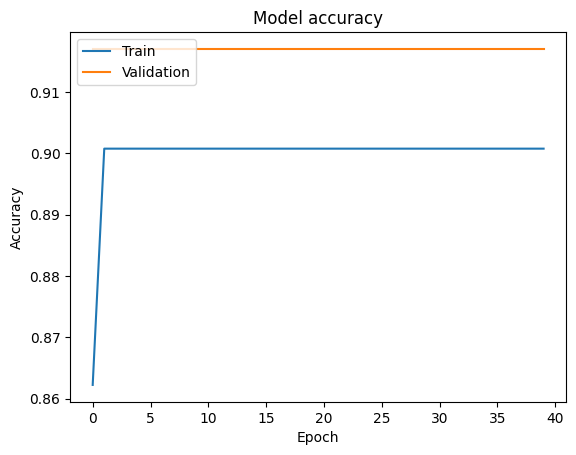

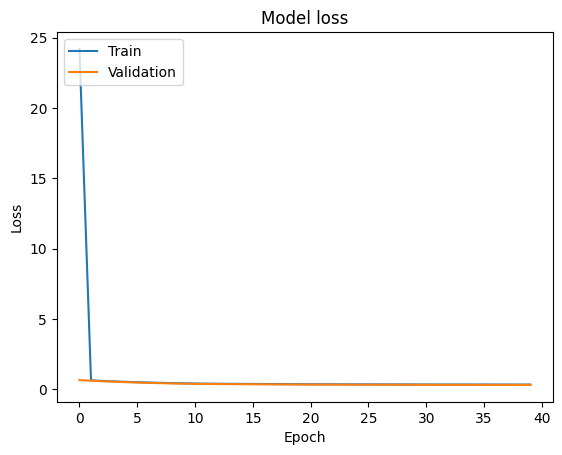

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import math

# Load the data
data = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")

# Split the data into input features and labels
X = data.drop(['ID', 'Personal Loan'], axis=1)
y = data['Personal Loan']

# Define the learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = lr / 2
    if epoch > 20:
        lr = lr / 2
    if epoch > 30:
        lr = lr / 2
    return lr

# Build the model
model = Sequential()
model.add(Dense(16, input_shape=(12,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a time-based learning rate schedule
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define the callbacks
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(X, y, epochs=40, validation_split=0.2, callbacks=[lr_scheduler])

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


12. Show the application of a drop-based learning rate schedule

Epoch 1/40
125/125 [==============================] - 3s 4ms/step - loss: 3196.9702 - accuracy: 0.5458 - val_loss: 45.8032 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 2/40
125/125 [==============================] - 0s 3ms/step - loss: 8.0490 - accuracy: 0.8420 - val_loss: 1.2898 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 3/40
125/125 [==============================] - 0s 3ms/step - loss: 2.5605 - accuracy: 0.8535 - val_loss: 1.5877 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 4/40
125/125 [==============================] - 0s 3ms/step - loss: 1.3680 - accuracy: 0.8700 - val_loss: 1.9138 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 5/40
125/125 [==============================] - 0s 3ms/step - loss: 1.7831 - accuracy: 0.8673 - val_loss: 0.6100 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 6/40
125/125 [==============================] - 0s 3ms/step - loss: 4.4124 - accuracy: 0.8475 - val_loss: 0.8029 - val_accuracy: 0.9090 - lr: 0.0010
Epoch 7/40
125/125 [==============================] - 0s 3ms/step 

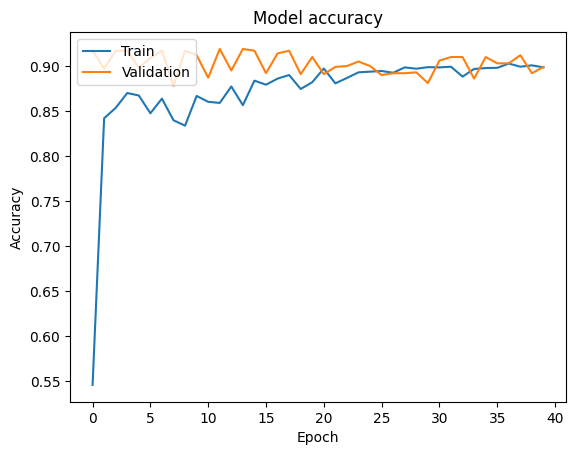

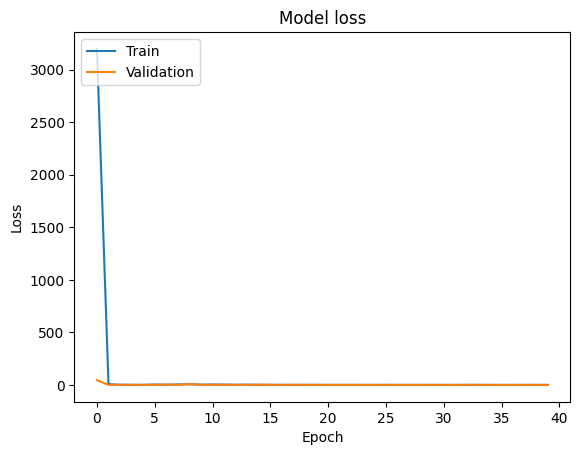

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import math

# Load the data
data = pd.read_csv("/content/drive/MyDrive/3rdYear/CPE019/hoa8.1/Bank_Personal_Loan_Modelling.csv")

# Split the data into input features and labels
X = data.drop(['ID', 'Personal Loan'], axis=1)
y = data['Personal Loan']

# Define the learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    drop = 0.5
    epochs_drop = 5
    if epoch > 10:
        lr = lr * math.pow(drop, math.floor((1+epoch-10)/epochs_drop))
    return lr

# Build the model
model = Sequential()
model.add(Dense(16, input_shape=(12,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a drop-based learning rate schedule
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define the callbacks
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(X, y, epochs=40, validation_split=0.2, callbacks=[lr_scheduler])

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Conclusion**

In conclusion I was able to save model using HDF5, JSON, and YAML format. Large arrays of real values can be stored in the flexible HDF5 format. JSON, or JavaScript, is a file format that employs the json() function to express data hierarchically. The model is programmed as model.json and is structured using the JSON language. The model definition is done in YAML format, saved in a file called model.yaml, and then imported into a new model using the model from yaml() method.


Submit the link to your Google Colab (make sure that it is accessible to me): https://colab.research.google.com/drive/1DY9zsCrhb6HEaTQIs6VGTM3WUeCflc-e#scrollTo=xh-88TSIv4g_

